In [1]:
import torch
import numpy as np
from generator import DepthNet
from torchvision import transforms
from PIL import Image
from discriminator import Discriminator
# from torchsummary import summary
import matplotlib.pyplot as plt
# import open3d as o3d
# import plotly.graph_objects as go
# import utils

In [2]:
rgb = Image.open("1.png")
rgb_array = np.asarray(rgb, order="C")
transform = transforms.ToTensor()
img = transform(rgb)
img = img[None, :, :, :]
print(img.shape)

model = DepthNet()
depth = model(img)
print(depth.shape)
depth = torch.squeeze(depth, dim=0)
# depth = np.transpose(depth.detach().numpy(), (1,2,0))
print(depth.shape)

# plt.imshow(depth, cmap="gray");

torch.Size([1, 3, 352, 1216])
encoder output shape: torch.Size([1, 1024, 6, 19])
decoder output shape: torch.Size([1, 1, 352, 1216])
torch.Size([1, 1, 352, 1216])
torch.Size([1, 352, 1216])


In [25]:
device = o3d.core.Device("cuda:0")

print(depth.shape)

depth = depth.detach().numpy()

depth_img = o3d.t.geometry.Image(depth[0]*255)
rgb_img = o3d.t.geometry.Image(rgb_array.astype(np.float32))
rgbd_img = o3d.t.geometry.RGBDImage(rgb_img, depth_img)
print(rgbd_img)

intrinsics = o3d.core.Tensor([[721.5377, 0, 596.5593],
                              [0, 721.5377, 149.854],
                              [0, 0, 1]])

pcd = o3d.t.geometry.PointCloud.create_from_rgbd_image(
    rgbd_img,
    intrinsics,
    depth_scale=1.0,
    depth_max=255.0)
print(pcd)


# pcd = utils.depth_rgb_to_pcd(depth, rgb, intrinsics)

torch.Size([1, 375, 1242])
RGBD Image pair [Aligned]
Color [size=(1242,375), channels=3, format=Float32, device=CPU:0]
Depth [size=(1242,375), channels=1, format=Float32, device=CPU:0]
PointCloud on CPU:0 [465750 points (Float32)].
Attributes: colors (dtype = Float32, shape = {465750, 3}).


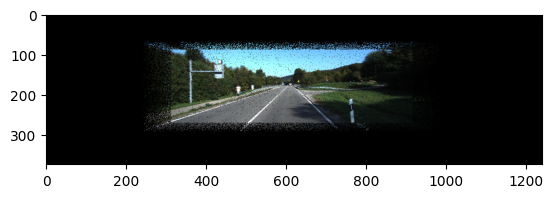

In [30]:

# extrinsics = o3d.core.Tensor([[0.26479293, 0.86222928, 0.43446898, 0.        ],
#                               [0.45140197, 0.34552593, 0.82155755, 0.        ],
#                               [0.85438314, 0.36970814, 0.36639319, 0.        ],
#                               [0.        , 0.        , 0.        , 1.        ]])

extrinsics = o3d.core.Tensor([[1., 0., 0., 0],
                              [0., 1., 0., 0],
                              [0., 0., 1., 0],
                              [0., 0., 0., 1.]])

rgbd_reproj = pcd.project_to_rgbd_image(
    1242,
    375,
    intrinsics,
    extrinsics,
    depth_scale=1.0,
    depth_max=255.0
)

plt.imshow(np.asarray(rgbd_reproj.color).astype(np.uint8));

In [ ]:
print(np.array(rgbd_reproj.color).shape)

(375, 1242, 3)
